In [4]:
import pathlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
sublist=['ec105', 'ec106', 'ec107', 'ec108', 'ec109']
# sublist=['ec108']
phase='refresh'
all=pd.DataFrame()
for sub in sublist:
    file='data/' + sub + phase + 'eyebehave.csv'
    print(file)
    eye=pd.read_csv(file, index_col=0)
    all=pd.concat([all,eye])
all.columns

data/ec105refresheyebehave.csv
data/ec106refresheyebehave.csv
data/ec107refresheyebehave.csv
data/ec108refresheyebehave.csv
data/ec109refresheyebehave.csv


Index(['block', 'cond', 'duration', 'end', 'endloc', 'event', 'loc1end',
       'loc1start', 'loc1x', 'loc1y', 'loc2end', 'loc2start', 'loc2x', 'loc2y',
       'loc3end', 'loc3start', 'loc3x', 'loc3y', 'objonset', 'recog loc',
       'recog order', 'refresh order', 'same/diff', 'start', 'startloc',
       'study order', 'sub', 'trialend', 'trialnum', 'xend', 'xstart', 'yend',
       'ystart'],
      dtype='object')

In [6]:
masterdf = all.copy()
masterdf

,block,cond,duration,end,endloc,event,loc1end,loc1start,loc1x,loc1y,...,start,startloc,study order,sub,trialend,trialnum,xend,xstart,yend,ystart
0,1,1.0,36,1421.844,NaN,EFIX,NaN,2143.153109,640.0,500.0,...,1387.844,offscreen,16.0,ec105,NaN,1,NaN,-1445.3,NaN,5.4
1,1,1.0,30,1451.844,offscreen,ESACC,2166.379782,2175.615467,640.0,500.0,...,1423.844,offscreen,16.0,ec105,NaN,1,-1479.0,-1475.5,49.4,-7.9
2,1,1.0,32,1483.844,NaN,blink,NaN,2192.055075,640.0,500.0,...,1453.844,offscreen,16.0,ec105,NaN,1,NaN,-1500.9,NaN,29.2
3,1,1.0,1094,2577.844,screen,ESACC,480.432482,2177.906013,640.0,500.0,...,1485.844,offscreen,16.0,ec105,NaN,1,986.4,-1488.6,167.1,39.2
4,1,1.0,256,2833.844,NaN,EFIX,NaN,476.465665,640.0,500.0,...,2579.844,screen,16.0,ec105,NaN,1,NaN,987.2,NaN,173.7
5,1,1.0,48,2881.844,screen,ESACC,681.760552,474.801274,640.0,500.0,...,2835.844,screen,16.0,ec105,NaN,1,1315.9,986.7,589.2,175.6
6,1,1.0,212,3093.844,NaN,EFIX,NaN,697.227574,640.0,500.0,...,2883.844,screen,16.0,ec105,NaN,1,NaN,1329.8,NaN,601.5
7,1,1.0,708,3801.844,screen,ESACC,664.685068,690.085654,640.0,500.0,...,3095.844,screen,16.0,ec105,NaN,1,1156.8,1321.1,918.0,611.0
8,1,1.0,128,3929.844,NaN,EFIX,NaN,689.600065,640.0,500.0,...,3803.844,screen,16.0,ec105,NaN,1,NaN,1191.5,NaN,914.0
9,1,1.0,26,3955.844,screen,ESACC,864.278659,685.146481,640.0,500.0,...,3931.844,screen,16.0,ec105,NaN,1,1407.6,1189.9,897.2,908.7


In [19]:
masterdf.set_index('start')
toplot_group=masterdf.groupby(['event', 'cond'])
newdf=pd.DataFrame()
for row, df in toplot_group:
    event, cond = row
    if row==('ESACC',1.0):
        newdf=df[['start', 'loc1start', 'sub']]

newdf['time']=newdf['start']    
newdf['start']=newdf['start']*1000000
newdf=newdf.set_index('start')    

In [17]:
import datetime


<Figure size 432x288 with 0 Axes>

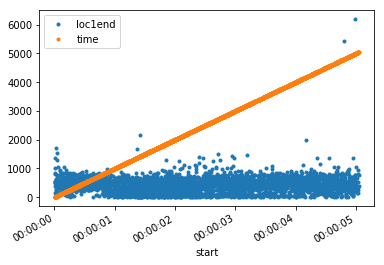

In [18]:
newdf = newdf.sort_index()
index2 = pd.to_datetime(newdf.index)
index2
newdf.index=index2
newdf
window = pd.Timedelta(value=50, unit='ms')
window
r=newdf.rolling(window=window).mean()
del r['time']
plt.figure(); newdf.plot(style='.');

In [91]:
xlim=[500, 2500]
xlim=[x*1000000 for x in xlim]

xlim=pd.to_datetime(xlim)
xlim

DatetimeIndex(['1970-01-01 00:00:00.500000', '1970-01-01 00:00:02.500000'], dtype='datetime64[ns]', freq=None)

(0, 2000)

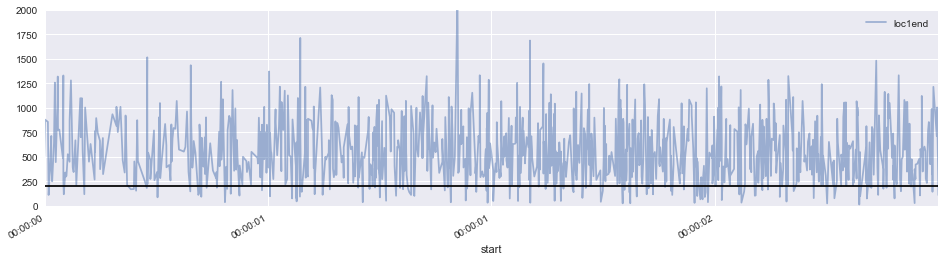

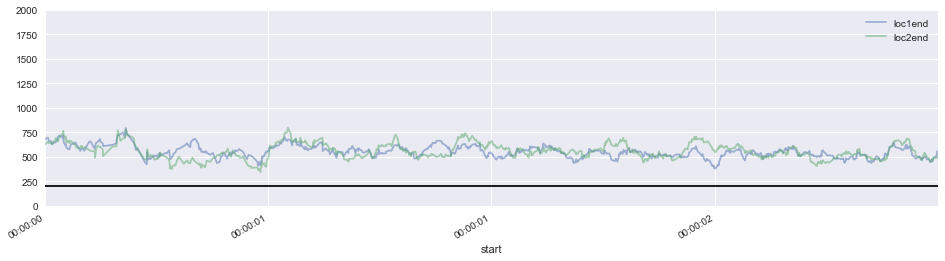

In [138]:
fig,ax=plt.subplots(figsize=(16,4))
newdf[['loc1end']].plot(ax=ax,alpha=0.5)
ax.plot(xlim,[200, 200], 'k')
ax.set_xlim(xlim)
ax.set_ylim([0, 2000])
fig,ax=plt.subplots(figsize=(16,4))
r[['loc1end','loc2end']].plot(ax=ax,alpha=0.5, style={'linestyle':'step'})
ax.plot(xlim,[200, 200], 'k')
ax.set_xlim(xlim)
ax.set_ylim([0, 2000])

In [ ]:
cond=1
name='end'
event='ESACC'

locs=['loc1', 'loc2', 'loc3']
blocks=[1]
trials=[1]
# def plot_individual_trials_distances(sub, cond, col, event):
locs=[loc+name for loc in locs]

subids=['ec105']
for sub in subids:
    for block in blocks:
        for trial in trials:
            initial_group=masterdf.groupby(['sub', 'event', 'block', 
                                            'trialnum']).get_group((sub, event, block, trial))
            times=initial_group['start']
            distances=initial_group[locs]

            one_loc=pd.DataFrame()
            all_locs=pd.DataFrame()
            for loc in locs:
                tmp=distances[loc]
                tmp.name='distance'
                one_loc=pd.concat([times, tmp], axis=1)
                one_loc['loc']=loc
                all_locs=pd.concat([all_locs,one_loc], ignore_index=True)
            all_locs['subject']=sub
            if len(all_locs)>len(locs):
                ax = sns.tsplot(time="start", value="distance", unit='subject', condition="loc", data=all_locs)

In [ ]:
new=pd.concat([times,distances],axis=1)
new['subject']='ec105'
new=new.set_index('start')
new

In [ ]:
# n = new.reset_index()
# ax = sns.tsplot(time='timepoint', value='BOLD signal',  data=gammas)
ax = sns.tsplot(time="timepoint", value="BOLD signal",
                  condition="ROI",
                 data=gammas)

In [ ]:
l = []
for loc, ldf in all_locs.groupby('loc'):
#     print(loc)
#     print(ldf.head())
    ldf = ldf.set_index('start')
    ldf = ldf['distance']
    ldf.name = loc
    l.append(ldf)
    
df2 = pd.DataFrame(l).T
df2

In [ ]:
fig, ax = plt.subplots()

for loc, locdf in all_locs.groupby('loc'):
    locdf.plot(ax=ax)
plt.show()
    

In [ ]:
x=all_locs['start'].values
y=all_locs['distance'].values

fig, ax = plt.subplots()
ax.plot(x, y '.')
plt.show()

In [ ]:
# all_locs.plot()
# one_loc.plot()
# ax = sns.tsplot(time="start", value="distance", condition="loc", data=one_loc)

fig, ax 


In [20]:
loc1end_saccades=masterdf[masterdf['endloc']=='loc1end']
loc1end_saccades=loc1end_saccades[loc1end_saccades['cond']==1.0]

loc1end_saccades=loc1end_saccades['start']
sns.set()
bins=np.linspace(0,5000,num=25)
print(bins)
ax = sns.distplot(loc1end_saccades_times_mismatch, hist_kws={'alpha':.5}, kde_kws={'bw':.15},bins=bins)
ax.set_ylim([0, .0004])
ax2 = sns.distplot(loc2end_saccades_times_mismatch, hist_kws={'alpha':.5}, ax=ax, kde_kws={'bw':.15},bins=bins)


[   0.          208.33333333  416.66666667  625.          833.33333333
 1041.66666667 1250.         1458.33333333 1666.66666667 1875.
 2083.33333333 2291.66666667 2500.         2708.33333333 2916.66666667
 3125.         3333.33333333 3541.66666667 3750.         3958.33333333
 4166.66666667 4375.         4583.33333333 4791.66666667 5000.        ]


NameError: name 'loc1end_saccades_times_mismatch' is not defined

/Users/drdj/.pyenv/versions/3.6.5/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 0.0004)

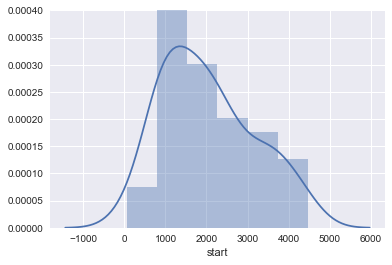

In [150]:
loc2end_saccades=masterdf[masterdf['endloc']=='loc2end']
loc2end_saccades=loc2end_saccades[loc2end_saccades['cond']==1.0]

loc2end_saccades=loc2end_saccades['start']
sns.set()
ax = sns.distplot(loc2end_saccades)
ax.set_ylim([0, .0004])

/Users/drdj/.pyenv/versions/3.6.5/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 0.0004)

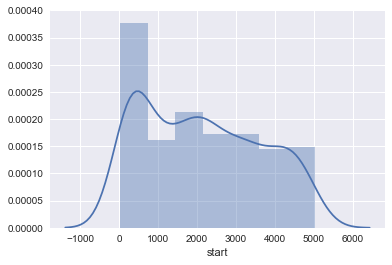

In [109]:
loc1end_saccades_match=loc1end_saccades[loc1end_saccades['cond']==2.0]
loc1end_saccades_times_match=loc1end_saccades_match['start']
loc1end_saccades_distances_match=loc1end_saccades_match['loc1end']
sns.set()
ax = sns.distplot(loc1end_saccades_times_match)
ax.set_ylim([0, .0004])

(0, 0.003)

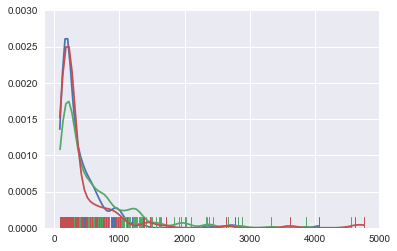

In [158]:
loc1_fix_mismatch=masterdf.groupby(['event', 'cond', 'startloc'])
for event, df in loc1_fix_mismatch:
    if event==('EFIX',1.0, 'loc1start'):
        loc1fixdf=df[['start','duration']]
        loc1fixdf=loc1fixdf[loc1fixdf['duration']>80]
        loc1fixdf=loc1fixdf.set_index('start')
    elif event==('EFIX',1.0, 'loc2start'):
        loc2fixdf=df[['start','duration']]
        loc2fixdf=loc2fixdf[loc2fixdf['duration']>80]
        loc2fixdf=loc2fixdf.set_index('start')
    elif event==('EFIX',1.0, 'loc3start'):
        loc3fixdf=df[['start','duration']]
        loc3fixdf=loc3fixdf[loc3fixdf['duration']>80]
        loc3fixdf=loc3fixdf.set_index('start')
            
        

sns.set()
bins=np.linspace(0,5000,num=25)

fig, ax = plt.subplots()
for d in [loc1fixdf,loc2fixdf, loc3fixdf]:
    sns.distplot(d, hist_kws={'alpha':.5}, rug=True, hist=False, kde_kws={'bw':.15},bins=bins, ax=ax)
ax.set_ylim([0, .003])
# ax2 = sns.distplot(loc2fixdf, hist_kws={'alpha':.5}, hist=False, ax=ax, kde_kws={'bw':.15},bins=bins)
# ax3 = sns.distplot(loc3fixdf, hist_kws={'alpha':.5}, hist=False, ax=ax, kde_kws={'bw':.15},bins=bins)
